# Titanic Train

In [52]:
import pandas as pd
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# DESCRIPTION OF DATASET

There are 12 columns :

1) Survived----> 0 means not survived/dead   1-----> survived

2)Pclass---> says that there are three classes class 1,class 2 and class 3

As there are only 2 states in survived(0/1) i.e either survived or dead we can use logistic regression here

Target Variable='SURVIVED'

Sex column has only 2 entities male and female therefore we can use one-hot encoder here

embark has 3 entites('C','S' and 'Q) so we can use label encoder here

Name column would not affect the target variable hence we can drop it

In [53]:
df.shape

(891, 12)

In [54]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [55]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we can see that there are certain null values in age cabin and embarked we shall fill those null values in future while data preparation

out of total 891 rows 687 values are null in 'Cabin' which amounts to 77% (687/891 are null)

as the acceptabe null values are only 30% we should prefer dropping the cabin col.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# EDA

#### visualizations

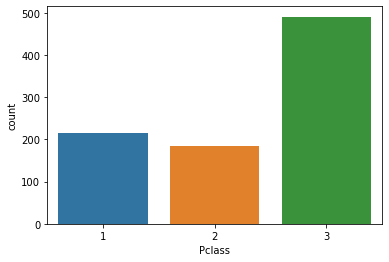

In [57]:
#lets see the distribution of classes using count plot

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

sns.countplot(df['Pclass'])
plt.show()

#### observations

Approximately 210 passengers belong to pclass 1

190 passengers belongs to class 2

approximately 490 people belongs to class 3

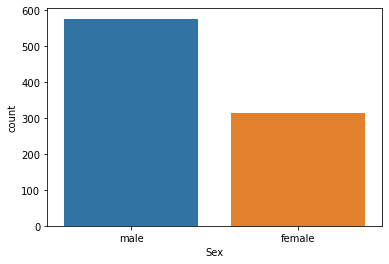

In [58]:
# observing how many males and females were present on the ship

sns.countplot(df['Sex'])
plt.show()

#### observations

There are total 580 males and approx 311 females on-board

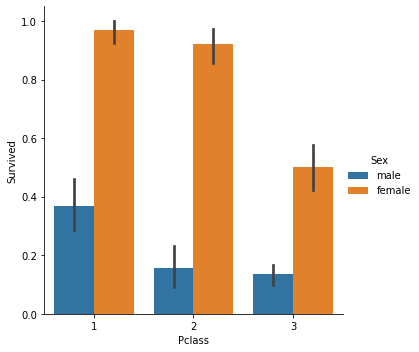

In [59]:
# how many males and females and from which class survived

sns.catplot(x='Pclass',y='Survived',data=df,hue='Sex',kind='bar')
plt.show()


#### observations

In each passenger class the number of females that survived are more than the males.

passengers in class 1 survived the most as compared to class 2 and 3

most of the passengers is class 3 did not survived (died)

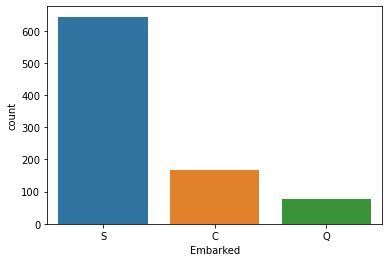

In [60]:
#number of passengers which fall into each embark
sns.countplot(df['Embarked'])
plt.show()

#### observations

C = Cherbourg =650

 Q = Queenstown=160
    
S = Southampton=81

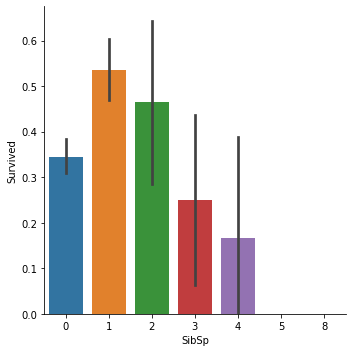

In [61]:
# how many males and females and from which class survived

sns.catplot(x='SibSp',y='Survived',data=df,kind='bar')
plt.show()


#### observation

passenger with 1 or 2 siblings or spouse most likely survived

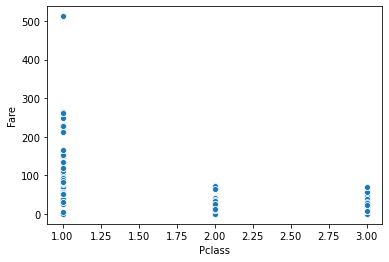

In [62]:
# how many males and females and from which class survived

sns.scatterplot(x='Pclass',y='Fare',data=df)
plt.show()


#### observations:

The fare for class 1 is maximumn

fare for class 2 and class 3 is moderate



# Data Preparation

we can see that the Name,ticket and cabin columns has nothing to do with the survival of passengers hence we can drop them



In [63]:
df.drop('Name',axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [64]:
#as cabin has 70% of Nan values we prefer dropping them and there is no relationship between ticket number and target

df.drop(['Cabin','Ticket'],axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [65]:
df['Age'].isnull().sum()

177

#### filling the null values in age with median/mean

In [66]:
#fill the NaN values in age with median of age
df['Age'].fillna(df['Age'].median(),inplace=True)

In [67]:
df.isnull().sum() # we can see that the null values in age are replaced with median of age

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

#### filling the null values in embarked with mode

In [68]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [69]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [70]:
df.shape

(891, 9)

In [71]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


#### we can see that there are 3 categories in embarked so let us label encode them 

In [72]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
df['Embarked']=le.fit_transform(df['Embarked'])
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,2
1,2,1,1,female,38.0,1,0,71.2833,0
2,3,1,3,female,26.0,0,0,7.9250,2
3,4,1,1,female,35.0,1,0,53.1000,2
4,5,0,3,male,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,2
887,888,1,1,female,19.0,0,0,30.0000,2
888,889,0,3,female,28.0,1,2,23.4500,2
889,890,1,1,male,26.0,0,0,30.0000,0


#### Encoding


c---->0

q---->1

s---->2

#### similarly lets encode the gender column

In [73]:
one=LabelEncoder()
df['Sex']=one.fit_transform(df['Sex'])
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,28.0,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


#### encoding

Male=1

female=0

#### Now that we have transformed all variables to numeric values we now perform logistic regression


In [74]:
#inputs
x=df.drop('Survived',axis=1)
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,13.0000,2
887,888,1,0,19.0,0,0,30.0000,2
888,889,3,0,28.0,1,2,23.4500,2
889,890,1,1,26.0,0,0,30.0000,0


In [75]:
#target variable
y=df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Model building

let us first find best random state for logistics regression

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

best_rstate=0
accu=0

for i in range(0,400):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    Lg=LogisticRegression()
    Lg.fit(x_train,y_train)
    y_pred=Lg.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
        
        
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate))   
        

Best accuracy is  40.164346805299324 found on random state 150


#### using random state 150 for the model

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=150)
Lg=LogisticRegression()
Lg.fit(x_train,y_train)
y_pred=Lg.predict(x_test)
score=r2_score(y_test,y_pred)
cvscore=cross_val_score(Lg,x_train,y_train,cv=5).mean()

print(f"r2 score is {score*100} and cross validation score is {cvscore*100}")


r2 score is 40.164346805299324 and cross validation score is 75.59645382111995


# As we can see the logistic REgressor model is not performing well we can go for classification

As R2  is not a good measure to assess goodness of fit for a classification.we use accuracy score here to find out the best classifier

# DecisionTreeClassifier

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
p=dt.predict(x_test)
print(f"accuracy score is {accuracy_score(y_test,p)*100}")

accuracy score is 77.13004484304933


# KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(x_train,y_train)
p=kn.predict(x_test)
print(f"accuracy score is {accuracy_score(y_test,p)*100}")

accuracy score is 64.12556053811659


# AdaBoostClassifier

In [80]:
from sklearn.ensemble import AdaBoostClassifier

abc=AdaBoostClassifier()
#AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,learning_rate=1.0)
abc.fit(x_train,y_train)
p=abc.predict(x_test)
print(f"accuracy score is {accuracy_score(y_test,p)*100}")


accuracy score is 87.4439461883408


#### from the above observations we can say that the adaboost classifier trains the model well and gives an accuracy of 87.44 %.

# Saving the best model

In [81]:
import pickle
filename='titanic_train_model.pkl'
pickle.dump(abc,open(filename,'wb'))  #saving the best model (Adaboost)

In [82]:
with open('titanic_train_model.pkl','rb') as f:
    x=pickle.load(f)

# Conclusion

In [83]:
#saving the actual values in an array
import numpy as np
a=np.array(y_test)
a

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [84]:
#saving the predicted values in np array
predicted=np.array(abc.predict(x_test))
predicted

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [87]:
#comparing the actual and predicted values
import pandas as pd
df_mod=pd.DataFrame({'original':a,'predicted':predicted})
df_mod.tail(20)

,original,predicted
203,1,1
204,0,0
205,0,0
206,0,0
207,1,1
208,1,1
209,1,1
210,1,1
211,0,0
212,0,0


In [86]:
y_test.shape

(223,)

#### Thus we have trained the model using Adaboost Classifier with 87% accuracy